In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('tableau-colorblind10')
import pandas as pd
import plotly.express as px
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data1 = pd.read_csv("Maharashtra Latest Covid Cases.csv")

In [4]:
data1.head()


,Districts,Positive Cases,Active Cases,Recovered,Deceased,Recovery Rate (%),Fatality Rate (%)
0,Ahmednagar,338227,2338,328882,7006,97.2,2.1
1,Akola,58759,23,57307,1425,97.5,2.4
2,Amravati,96226,12,94618,1594,98.3,1.7
3,Aurangabad,155149,433,150452,4250,97.0,2.7
4,Beed,103652,123,100721,2801,97.2,2.7


In [5]:
data1.tail()


,Districts,Positive Cases,Active Cases,Recovered,Deceased,Recovery Rate (%),Fatality Rate (%)
30,Solapur,210099,500,203955,5534,97.1,2.6
31,Thane,608496,3609,593438,11414,97.5,1.9
32,Wardha,57336,5,55949,1217,97.6,2.1
33,Washim,41659,4,41015,637,98.5,1.5
34,Yavatmal,75960,6,74152,1798,97.6,2.4


In [6]:
data1.dtypes


Districts             object
Positive Cases         int64
Active Cases           int64
Recovered              int64
Deceased               int64
Recovery Rate (%)    float64
Fatality Rate (%)    float64
dtype: object

In [7]:
data1.shape


(35, 7)

In [8]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Districts          35 non-null     object 
 1   Positive Cases     35 non-null     int64  
 2   Active Cases       35 non-null     int64  
 3   Recovered          35 non-null     int64  
 4   Deceased           35 non-null     int64  
 5   Recovery Rate (%)  35 non-null     float64
 6   Fatality Rate (%)  35 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ KB


In [9]:
data1.describe()


,Positive Cases,Active Cases,Recovered,Deceased,Recovery Rate (%),Fatality Rate (%)
count,3.500000e+01,35.000000,3.500000e+01,35.000000,35.000000,35.000000
mean,1.885630e+05,689.657143,1.837745e+05,3995.828571,97.534286,2.222857
std,2.388083e+05,1550.219832,2.328015e+05,4440.898852,0.626823,0.505898
min,1.847400e+04,0.000000,1.794300e+04,506.000000,96.300000,0.900000
25%,5.804750e+04,13.000000,5.662800e+04,1213.000000,97.100000,1.900000
50%,9.037600e+04,61.000000,8.769600e+04,2433.000000,97.500000,2.300000
75%,2.080740e+05,506.500000,2.019285e+05,5571.000000,97.950000,2.650000
max,1.152592e+06,6955.000000,1.125722e+06,19566.000000,99.000000,3.100000


In [10]:
data1.rename(columns={col:col.replace(' ', '') for col in data1.columns}, inplace=True)


In [11]:
data1.head()

,Districts,PositiveCases,ActiveCases,Recovered,Deceased,RecoveryRate(%),FatalityRate(%)
0,Ahmednagar,338227,2338,328882,7006,97.2,2.1
1,Akola,58759,23,57307,1425,97.5,2.4
2,Amravati,96226,12,94618,1594,98.3,1.7
3,Aurangabad,155149,433,150452,4250,97.0,2.7
4,Beed,103652,123,100721,2801,97.2,2.7


In [12]:
data1.isnull().sum()

Districts          0
PositiveCases      0
ActiveCases        0
Recovered          0
Deceased           0
RecoveryRate(%)    0
FatalityRate(%)    0
dtype: int64

In [13]:
new_df = data1.loc[data1.ActiveCases > 500]
new_df1 = data1.loc[data1.ActiveCases <= 500]

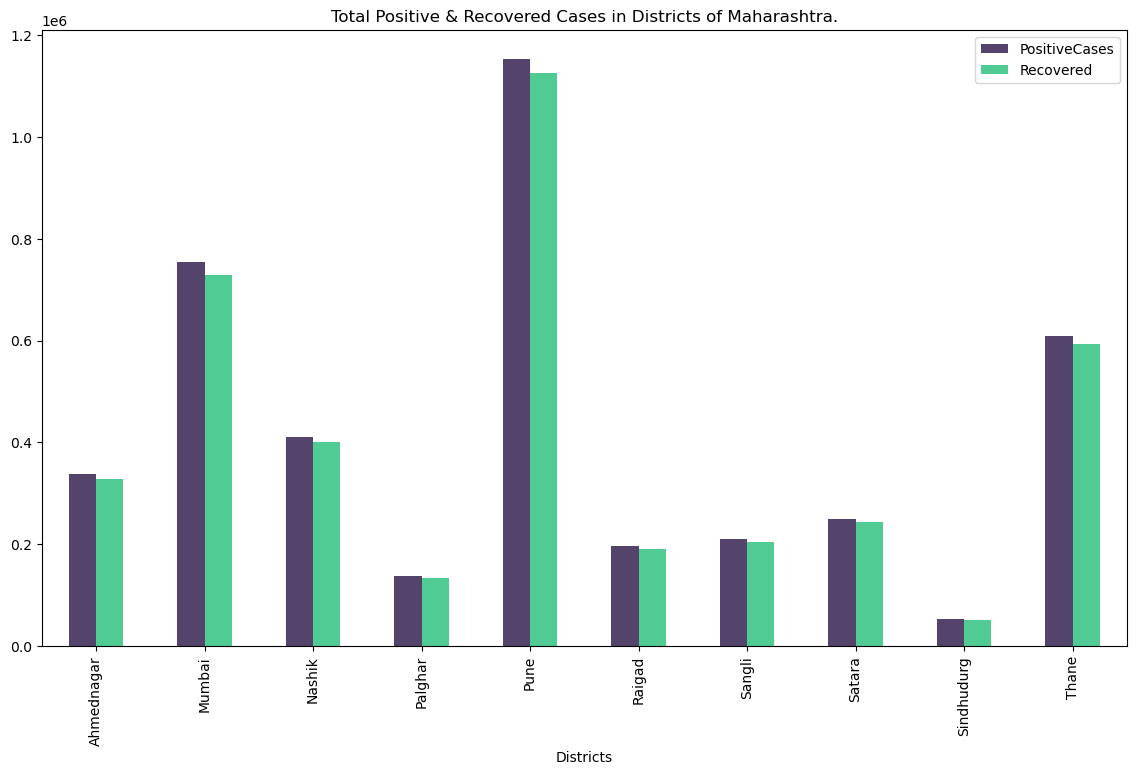

In [14]:
# Total Positive and Recovered cases by Districts.

df = new_df.loc[:, ['Districts', 'PositiveCases', 'Recovered']]
df.set_index('Districts', inplace=True)

df.plot(kind='bar', figsize=(14, 8), color=['#54436B', '#50CB93'])

plt.title("Total Positive & Recovered Cases in Districts of Maharashtra.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

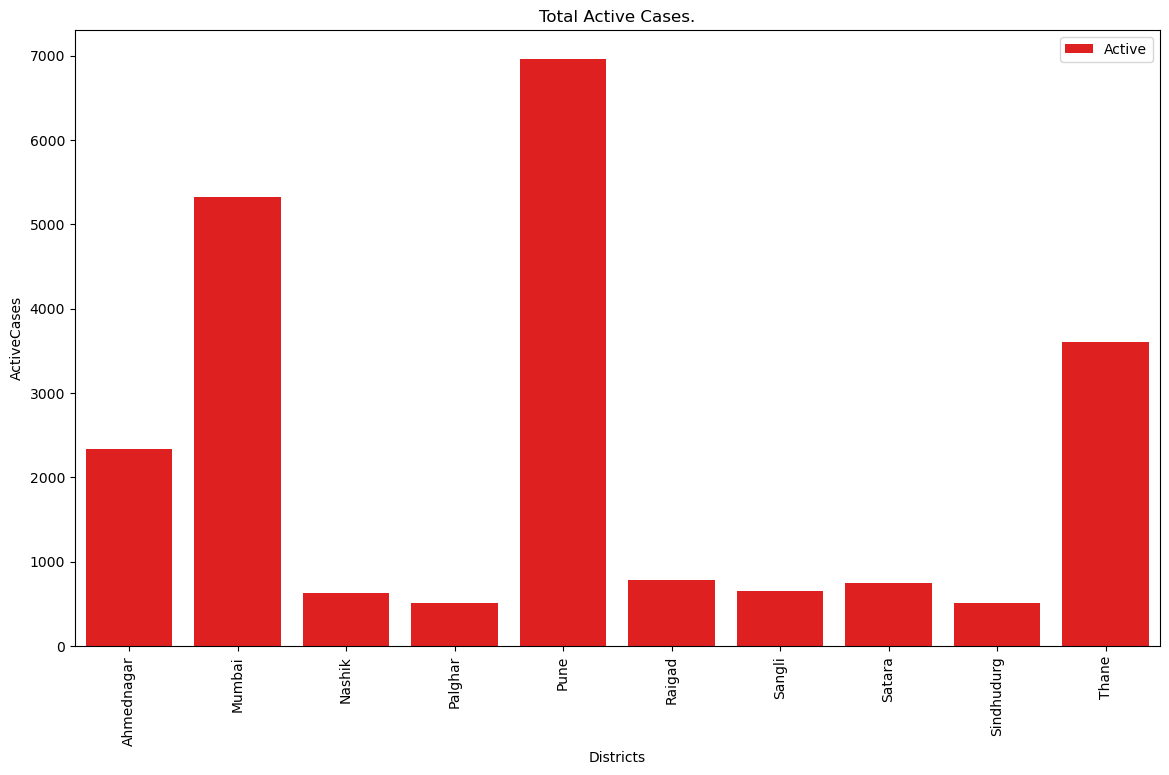

In [15]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Districts', y="ActiveCases", color="red", label="Active", data = new_df)

plt.title("Total Active Cases.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

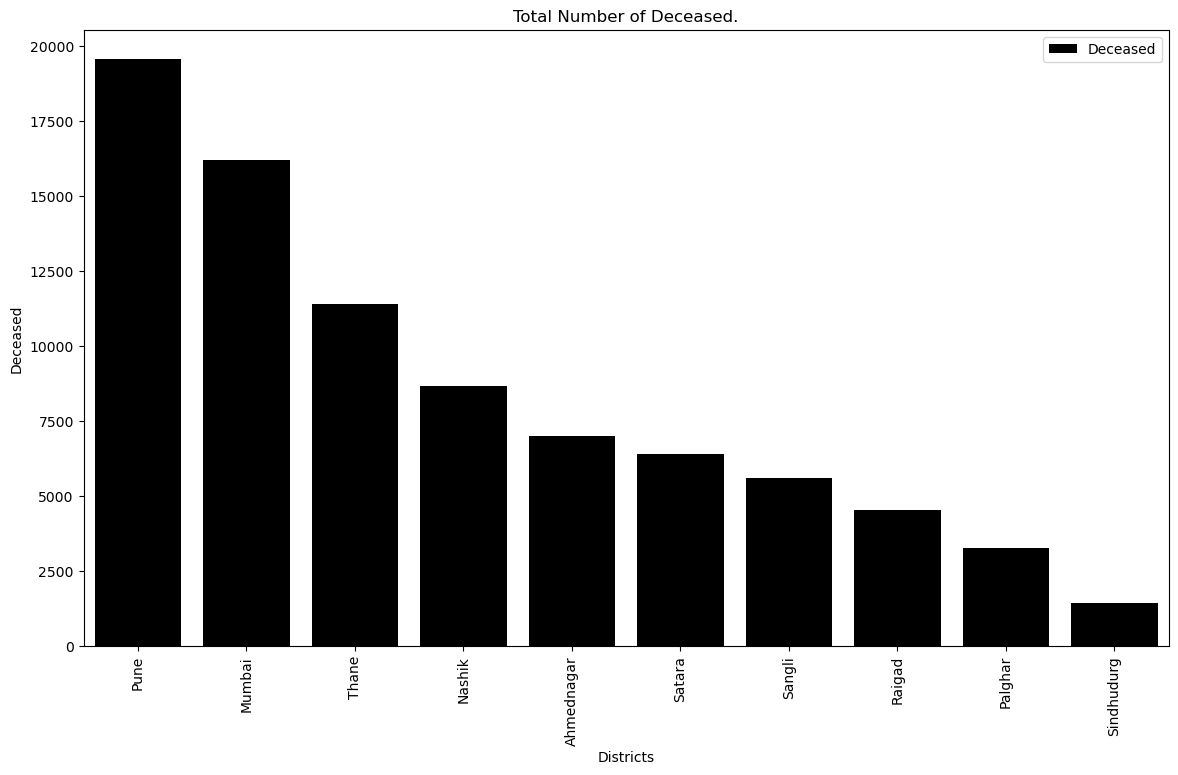

In [16]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Districts', y="Deceased", color="black", label="Deceased", data = new_df.sort_values(by='Deceased', ascending=False))

plt.title("Total Number of Deceased.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

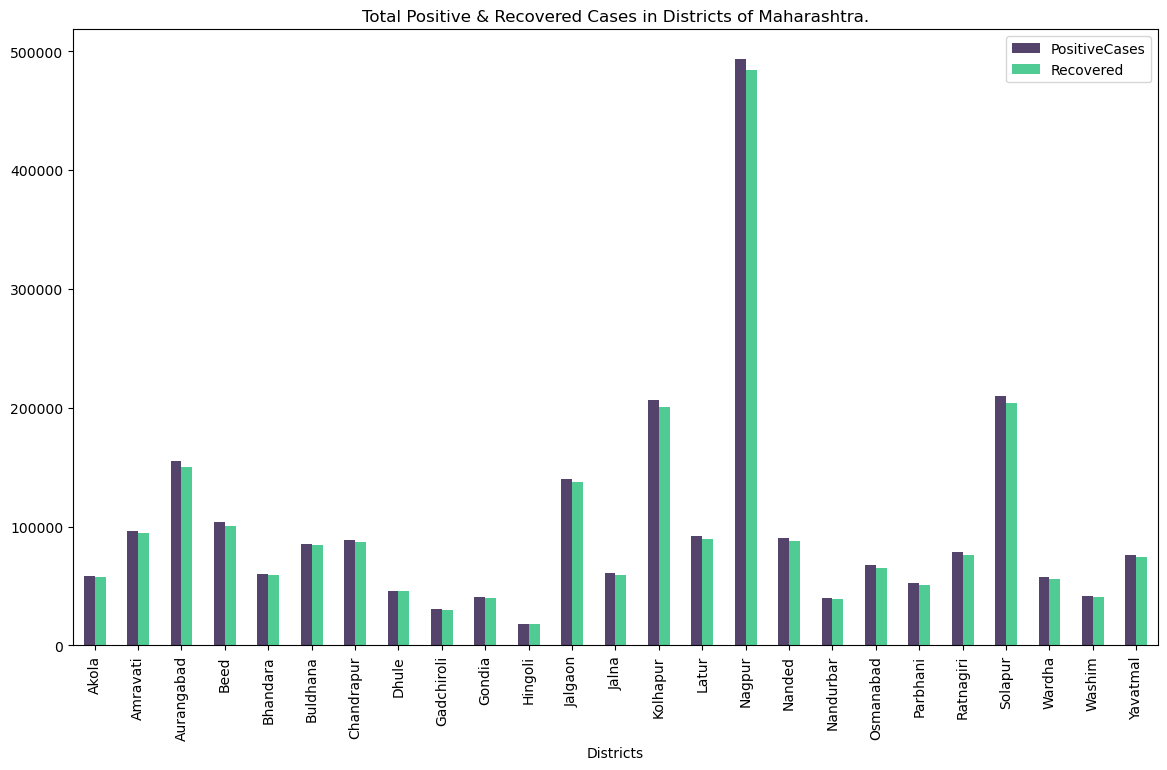

In [17]:
df = new_df1.loc[:, ['Districts', 'PositiveCases', 'Recovered']]
df.set_index('Districts', inplace=True)

df.plot(kind='bar', figsize=(14, 8), color=['#54436B', '#50CB93'])

plt.title("Total Positive & Recovered Cases in Districts of Maharashtra.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

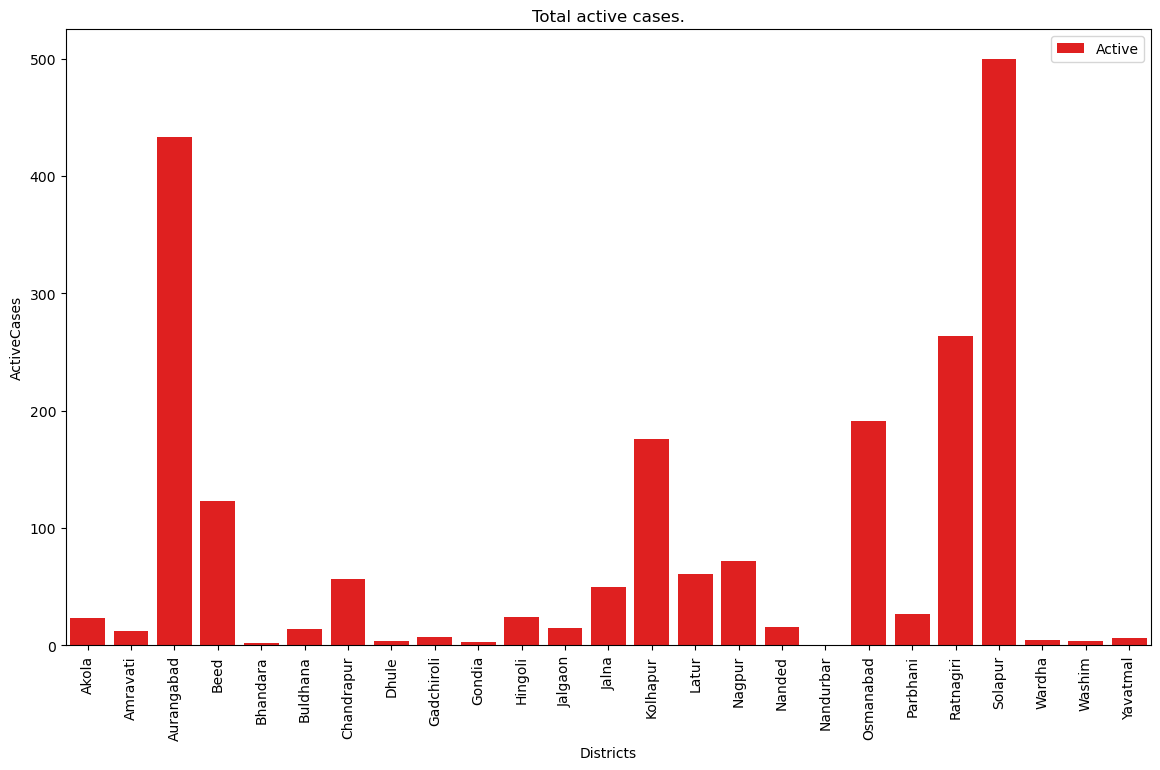

In [18]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Districts', y="ActiveCases", color="red", label="Active", data = new_df1)

plt.title("Total active cases.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

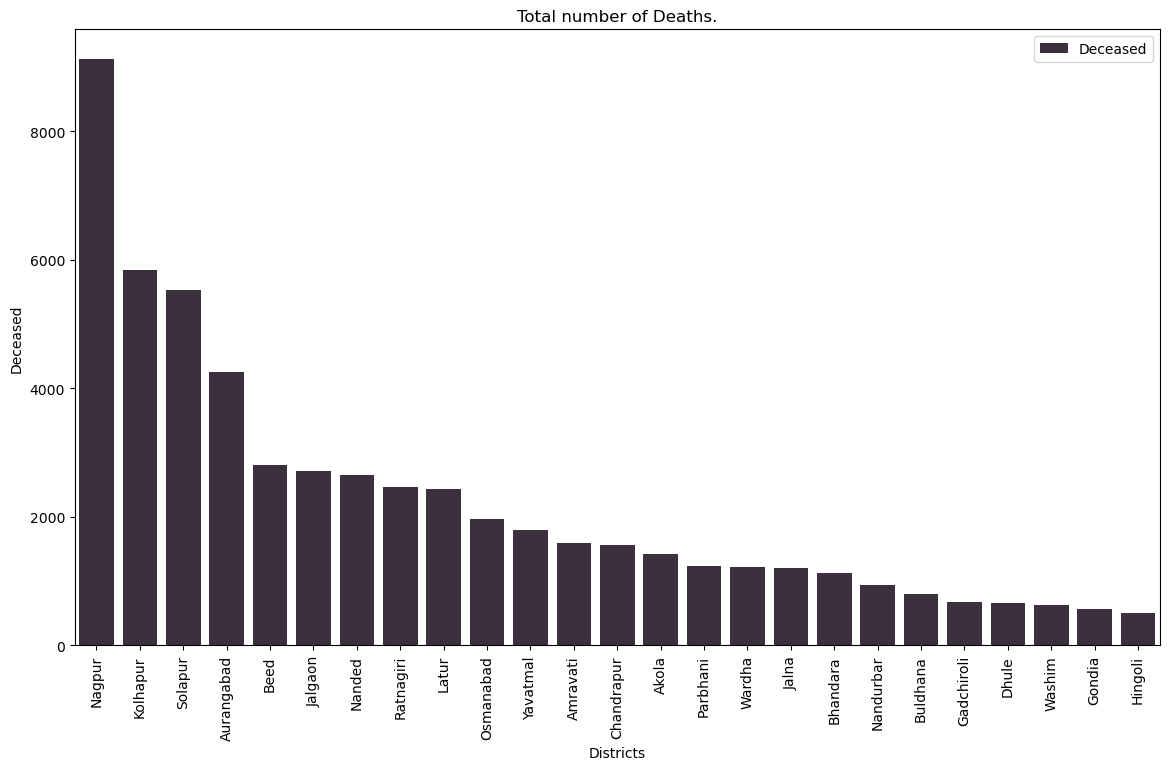

In [19]:
plt.figure(figsize=(14, 8))

sns.barplot(x='Districts', y="Deceased", color="#3E2C41", label="Deceased", data =new_df1.sort_values(by="Deceased", ascending=False))

plt.title("Total number of Deaths.")

plt.xticks(rotation=90)
plt.legend()

plt.show()

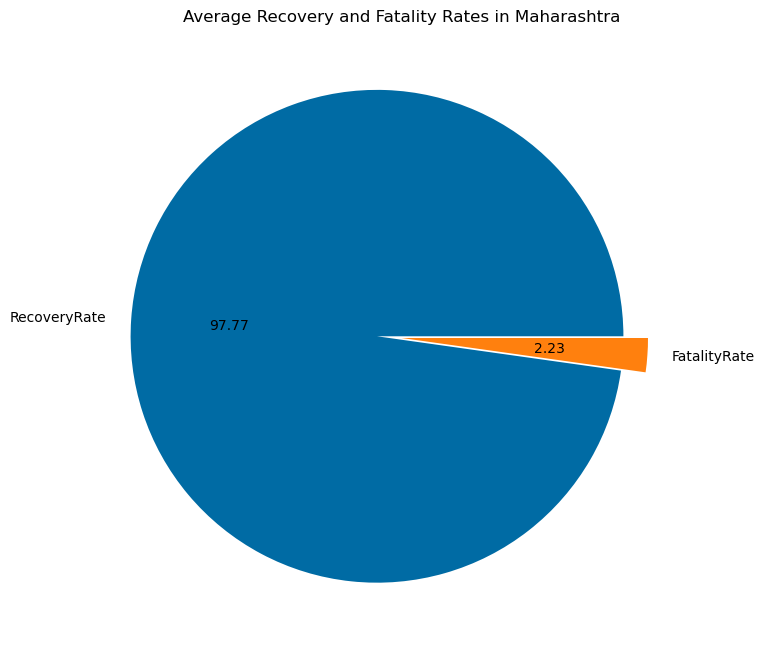

In [20]:
avg_recovery_rate = round(data1['RecoveryRate(%)'].mean(), 2)
avg_fatality_rate = round(data1['FatalityRate(%)'].mean(), 2)
col = ['RecoveryRate', 'FatalityRate']

plt.figure(figsize=(10, 8))
plt.pie([avg_recovery_rate,avg_fatality_rate], labels=col, explode=[0.1, 0], autopct="%0.2f")

plt.title('Average Recovery and Fatality Rates in Maharashtra')
plt.show()